National Institute for Space Research \\
Subject: Computational Statistics

Let us consider this Cerrado biome image dataset shown here. This is a small subset of a larger Cerrado biome dataset presented here. To solve this exercise, you need to:

Read/open the images. There are several ways to do it (in Python, in other programming languages);
Select image features. Image features are important to represent each image. Select at least two of these features.

Develop a program to (Suggestion: use Google Colab):

1. Estimate the probability density function for the entire dataset. Show the plot. What is the best bandwidth in this case?
2. Present the components based on this dataset. Use Gaussian Mixture Models (GMMs) as a clustering technique to solve this item;
3. Select 10 of the images of the dataset and add Gaussian noise to each of them. Show: a) the 10 images without noise and the corresponding histograms; b) the 10 images with the added noise and the corresponding histograms. Comment about the differences.

# Download

In [ ]:
import requests
import os
import zipfile

def unzip(filename, destino):
  with zipfile.ZipFile('small-cerrado-dataset.zip', 'r') as zip_ref:
    # Extraia todos os arquivos para o diretório de destino
    zip_ref.extractall('/content/')

  print("Arquivos extraídos com sucesso!")

def baixar_arquivo(url, destino):
    # Faz a requisição GET para a URL
    resposta = requests.get(url)

    # Verifica se a requisição foi bem sucedida
    if resposta.status_code == 200:
        # Abre o arquivo no modo de escrita binária e escreve os dados recebidos
        with open(destino, 'wb') as arquivo:
            arquivo.write(resposta.content)
        print("The file small-cerrado-dataset.zip  was downloaded.!\n\n")
    else:
        print(f"Erro ao baixar o arquivo. Código de status: {resposta.status_code}")

if not os.path.exists('small-cerrado-dataset.zip'):
  filename = 'small-cerrado-dataset.zip'
  url = f'https://www.kaggle.com/api/v1/datasets/download/valdivinosantiago/another-small-cerrado-dataset?datasetVersionNumber=1'
  destino = 'small-cerrado-dataset.zip'
  baixar_arquivo(url, destino)
  # Descompactar os dados
  unzip(filename, destino)
  arquivos = os.listdir('/content/cerradatav3small') #guardando nomes dos arquivos
else:
  arquivos = os.listdir('/content/cerradatav3small') #guardando nomes dos arquivos
  print("The small-cerrado-dataset.zip has already been downloaded...\n\n")

The file small-cerrado-dataset.zip  was downloaded.!


Arquivos extraídos com sucesso!


# *Delete* directory

In [ ]:
# import shutil
# shutil.rmtree('/content/cerradatav3small')

# Way complete

In [ ]:
import numpy as np

way = []
for arquivo in arquivos:
  caminho_completo = os.path.join('/content/cerradatav3small', arquivo)
  way.append(caminho_completo)
  #print(caminho_completo)

# Reading

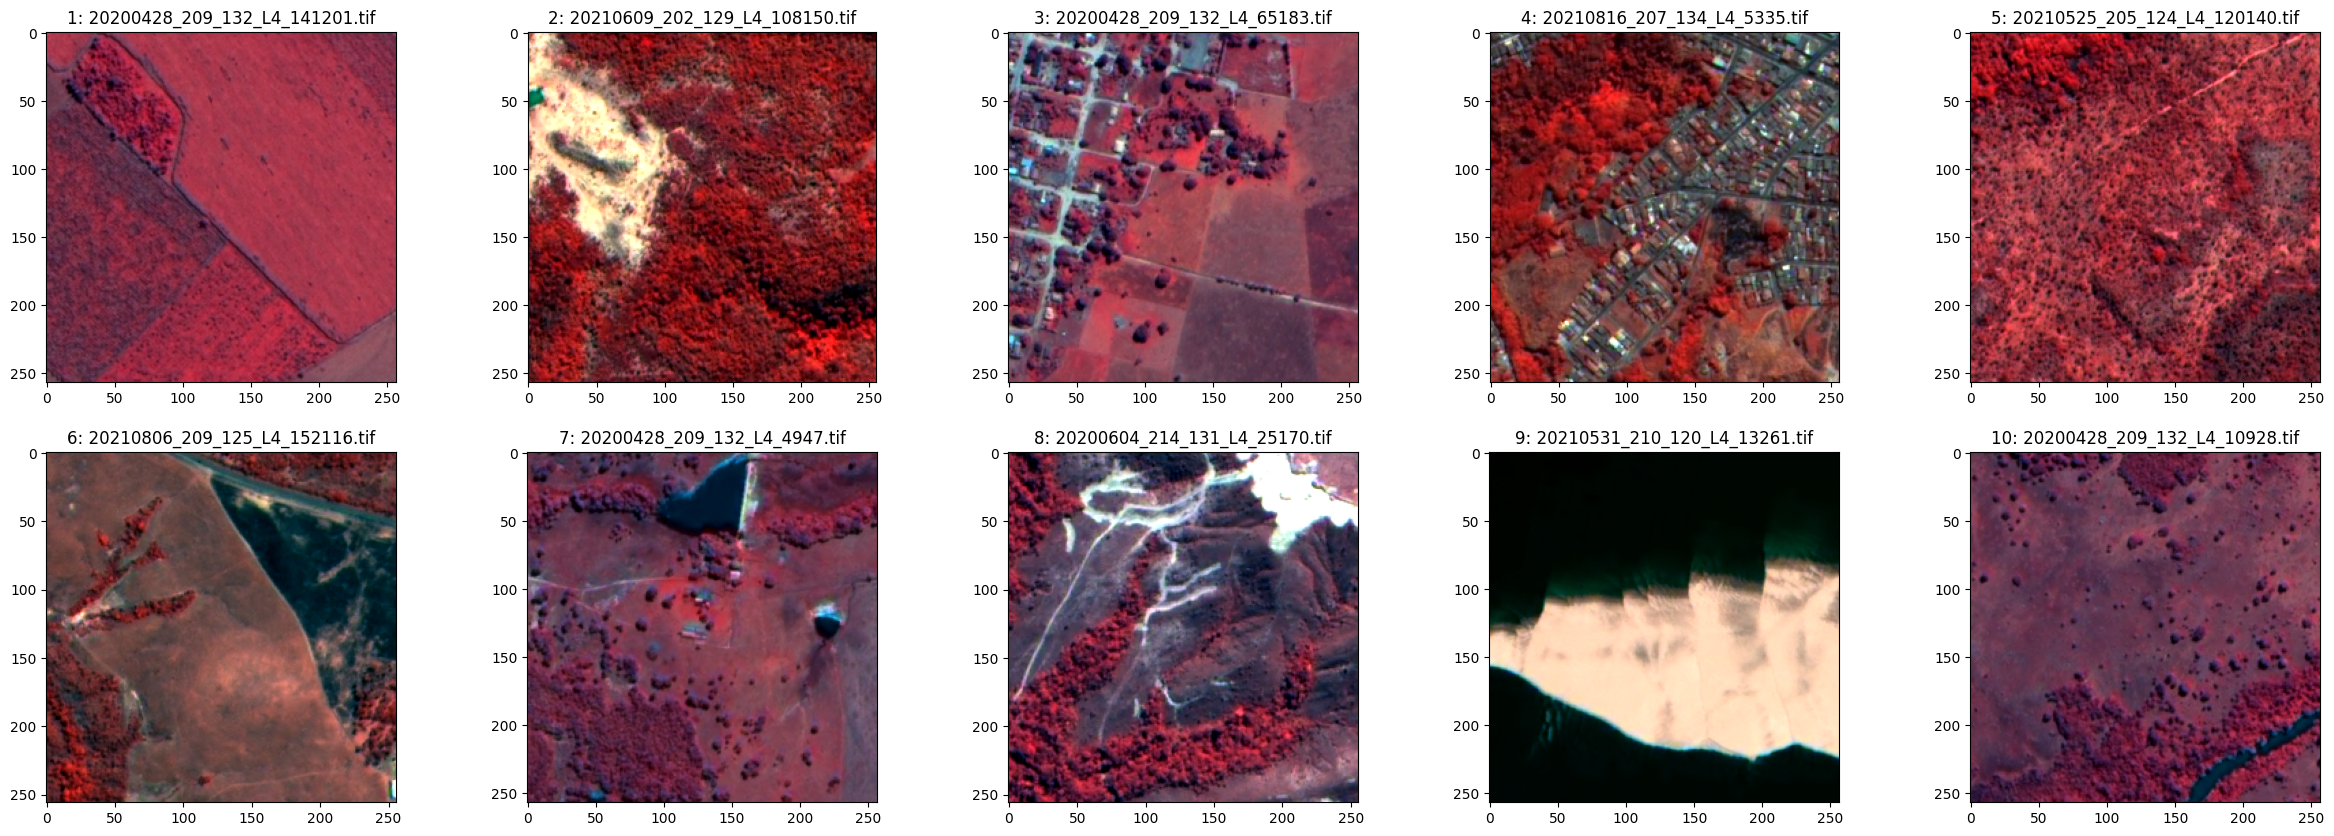

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2

img = []
img_rgba = []
img_rgb = []
img_gray = []
t = 10
plt.figure(figsize=(30, 10))

for i in range(t):
  img.append(cv2.imread(way[i])) #Lê em BGR
  img_rgba.append(cv2.cvtColor(img[i], cv2.COLOR_BGR2RGBA))
  img_rgb.append(cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB))
  img_gray.append(cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY))
  plt.subplot(2, 5, i+1)
  plt.imshow(img_rgb[i])
  plt.title(f"{i+1}: {arquivos[i]}")
  # cv2_imshow(img[i])


# Resolution

In [ ]:
for i in range(t):
  altura, largura, canais = img_rgb[i].shape
  print(i+1,  "Resolução da imagem: {}x{}".format(largura, altura), f'Banda: {canais} imagem: {arquivos[i]}')

1 Resolução da imagem: 257x257 Banda: 3 imagem: 20200428_209_132_L4_141201.tif
2 Resolução da imagem: 256x257 Banda: 3 imagem: 20210609_202_129_L4_108150.tif
3 Resolução da imagem: 257x257 Banda: 3 imagem: 20200428_209_132_L4_65183.tif
4 Resolução da imagem: 256x257 Banda: 3 imagem: 20210816_207_134_L4_5335.tif
5 Resolução da imagem: 257x257 Banda: 3 imagem: 20210525_205_124_L4_120140.tif
6 Resolução da imagem: 256x256 Banda: 3 imagem: 20210806_209_125_L4_152116.tif
7 Resolução da imagem: 257x257 Banda: 3 imagem: 20200428_209_132_L4_4947.tif
8 Resolução da imagem: 256x256 Banda: 3 imagem: 20200604_214_131_L4_25170.tif
9 Resolução da imagem: 257x257 Banda: 3 imagem: 20210531_210_120_L4_13261.tif
10 Resolução da imagem: 257x257 Banda: 3 imagem: 20200428_209_132_L4_10928.tif


# Analyzing the channels

In [ ]:
def medidas(canal_nir,canal_verde, canal_azul, i):
    print(arquivos[i])
    print(f"nir - Media: {np.mean(canal_nir)} Desvio_padrão: {np.std(canal_nir)}")
    print(f"Verde - Media: {np.mean(canal_verde)} Desvio_padrão: {np.std(canal_verde)}")
    print(f"Azul - Media: {np.mean(canal_azul)} Desvio_padrão: {np.std(canal_azul)}")
    print("-----------------------------")

20200428_209_132_L4_141201.tif
nir - Media: 143.63178852064377 Desvio_padrão: 31.143147067569103
Verde - Media: 48.757997850081 Desvio_padrão: 12.175193549625206
Azul - Media: 71.93105118926857 Desvio_padrão: 11.477641592392947
-----------------------------
20210609_202_129_L4_108150.tif
nir - Media: 131.09040612840468 Desvio_padrão: 56.18227416915009
Verde - Media: 54.33066330252918 Desvio_padrão: 63.53374013383892
Azul - Media: 51.75252310311284 Desvio_padrão: 50.3465118714039
-----------------------------
20200428_209_132_L4_65183.tif
nir - Media: 122.1427727898984 Desvio_padrão: 38.204177792279914
Verde - Media: 69.11167466577844 Desvio_padrão: 32.36287432022157
Azul - Media: 89.02107526230526 Desvio_padrão: 29.836306084416552
-----------------------------
20210816_207_134_L4_5335.tif
nir - Media: 105.3032891536965 Desvio_padrão: 38.17937616344859
Verde - Media: 56.04143360894942 Desvio_padrão: 35.23766390356437
Azul - Media: 55.81695342898833 Desvio_padrão: 34.295196224888684
----

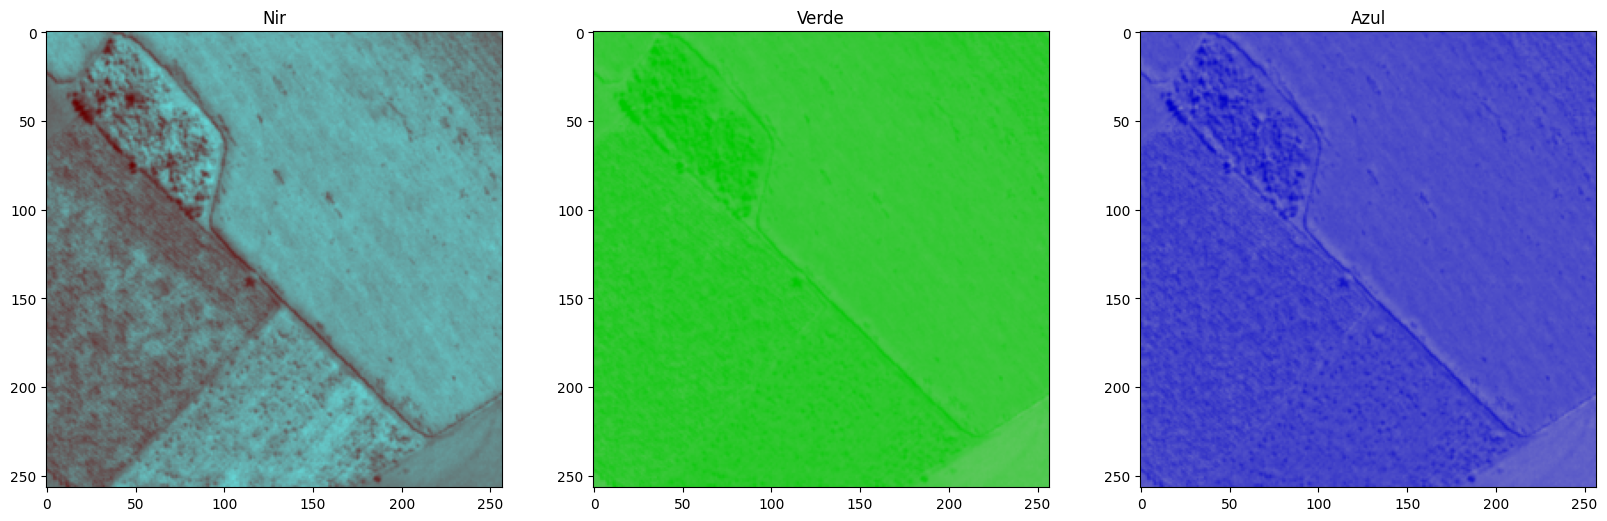

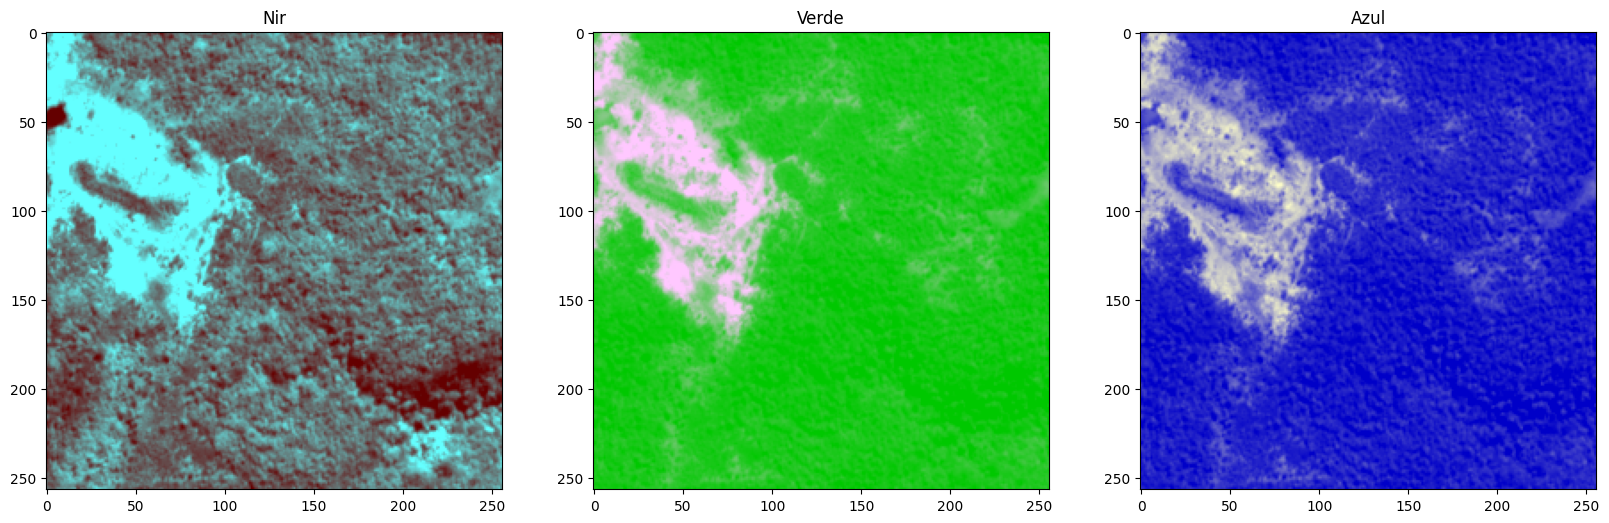

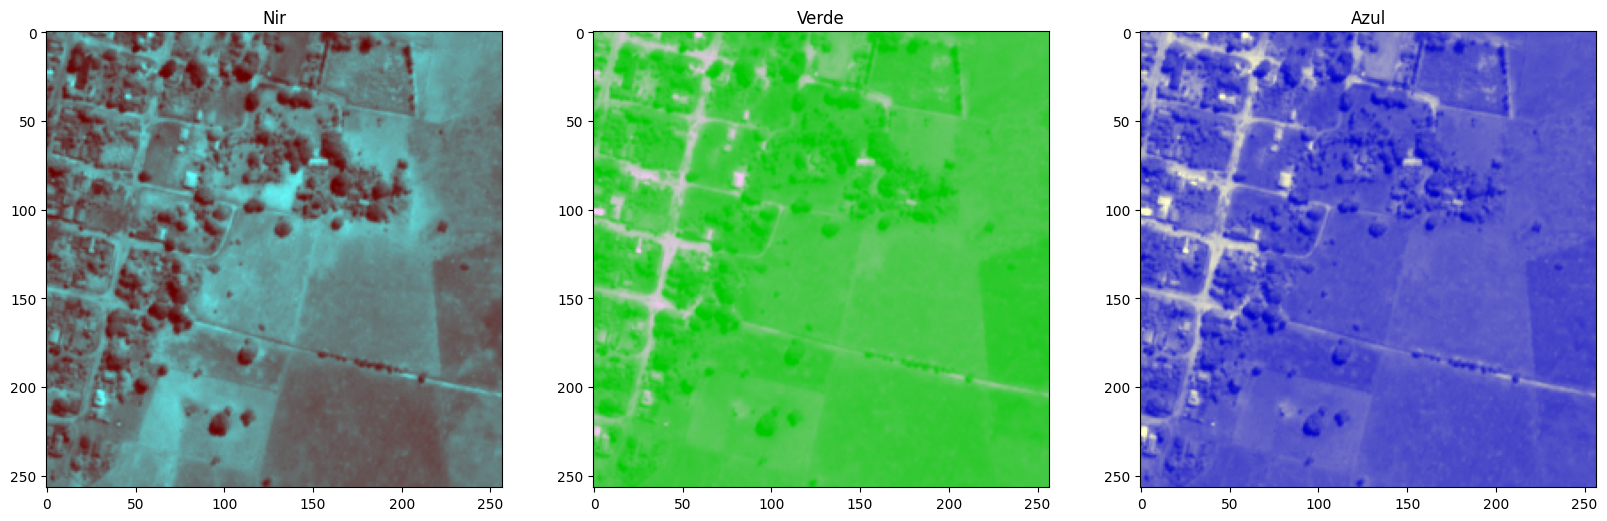

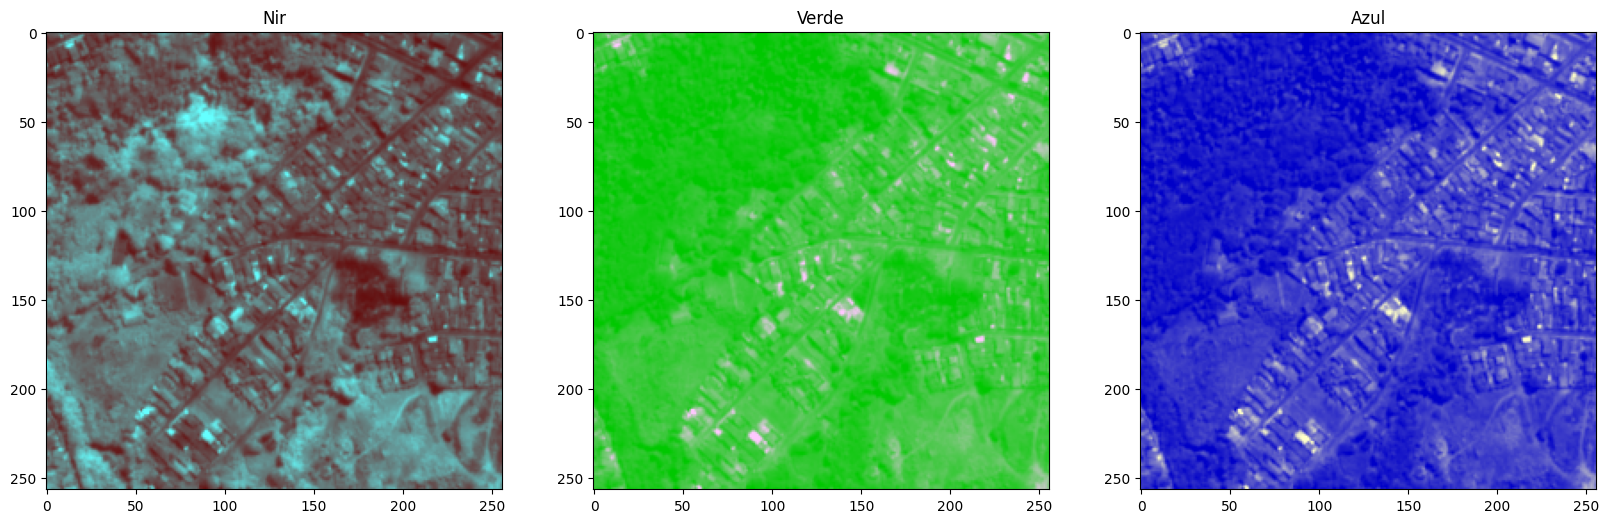

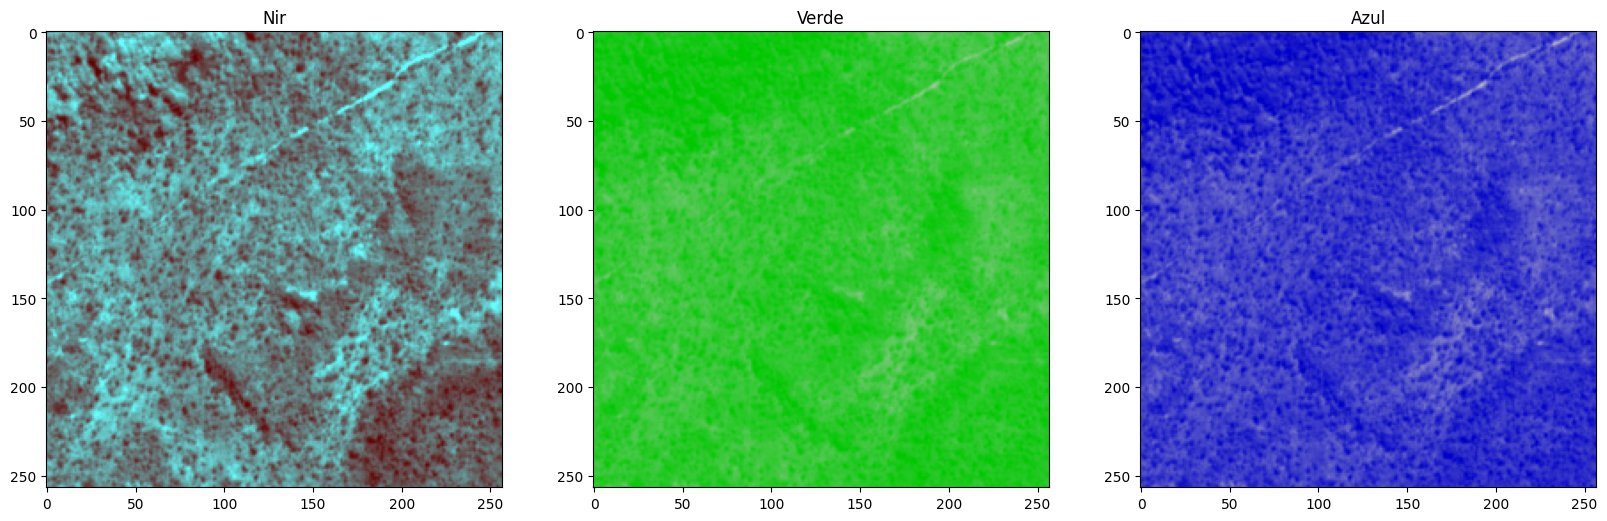

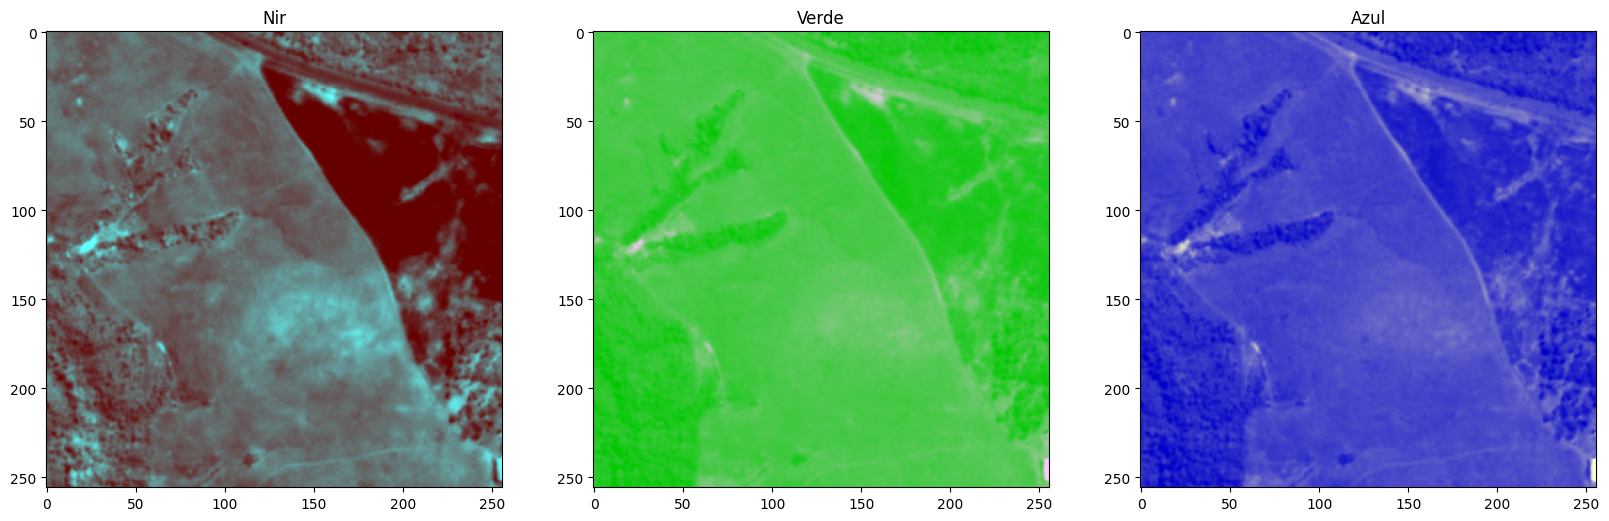

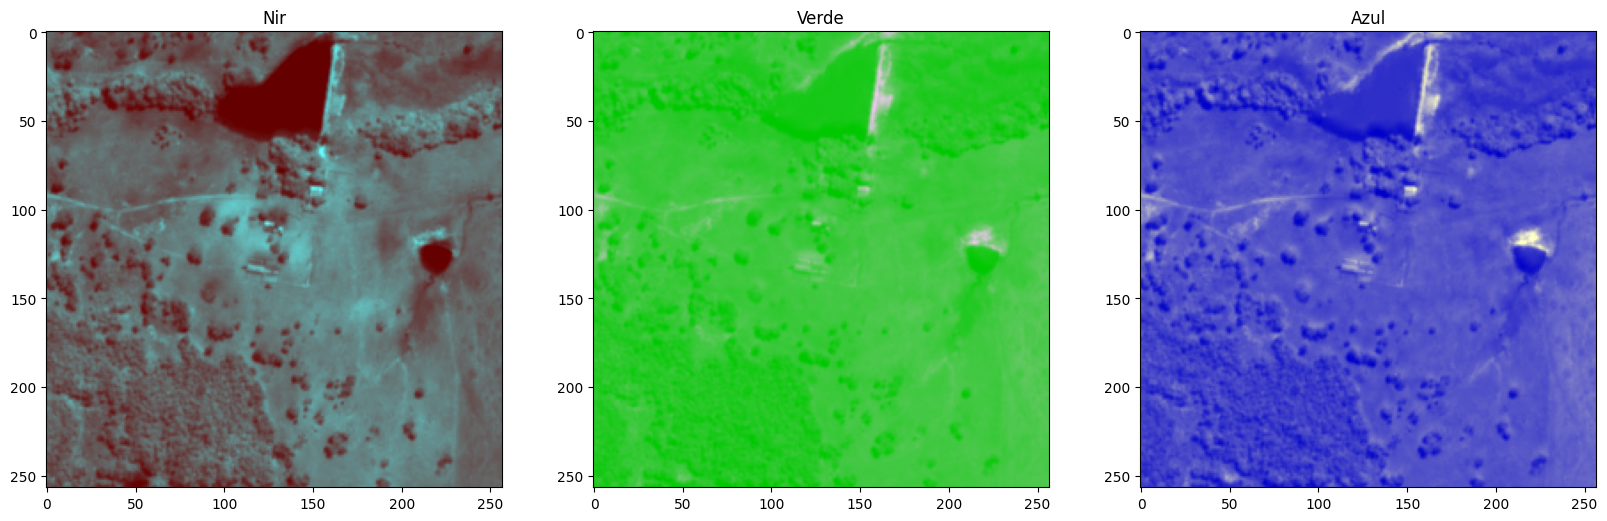

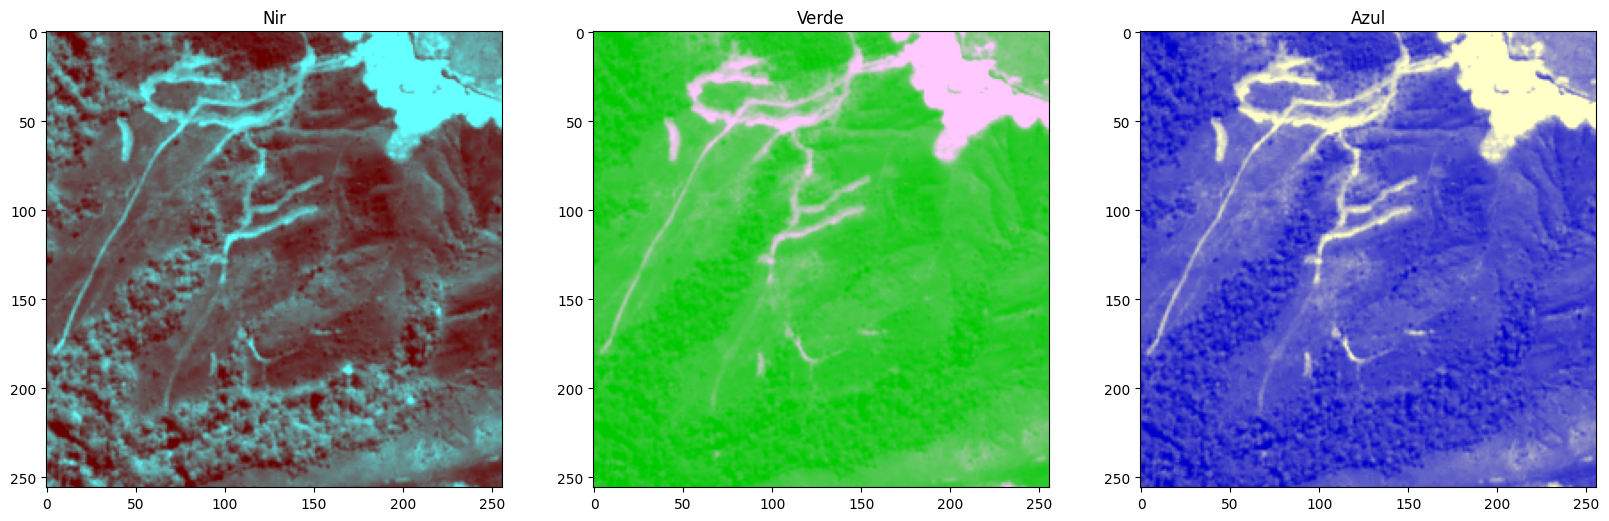

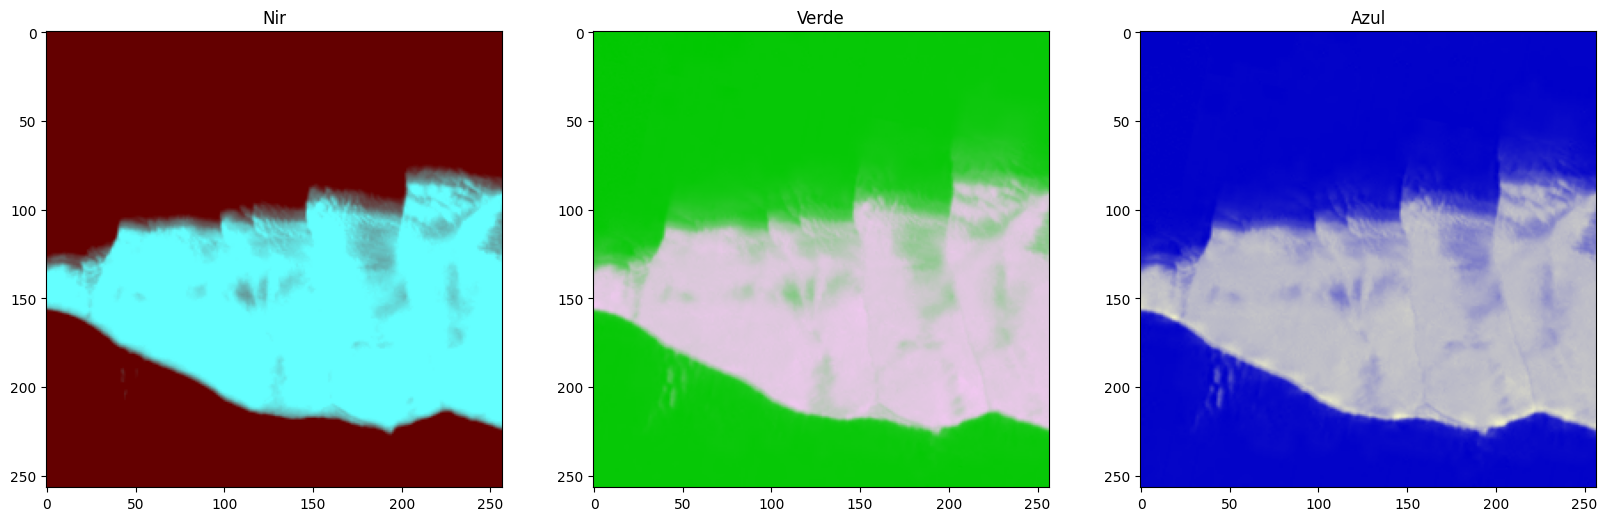

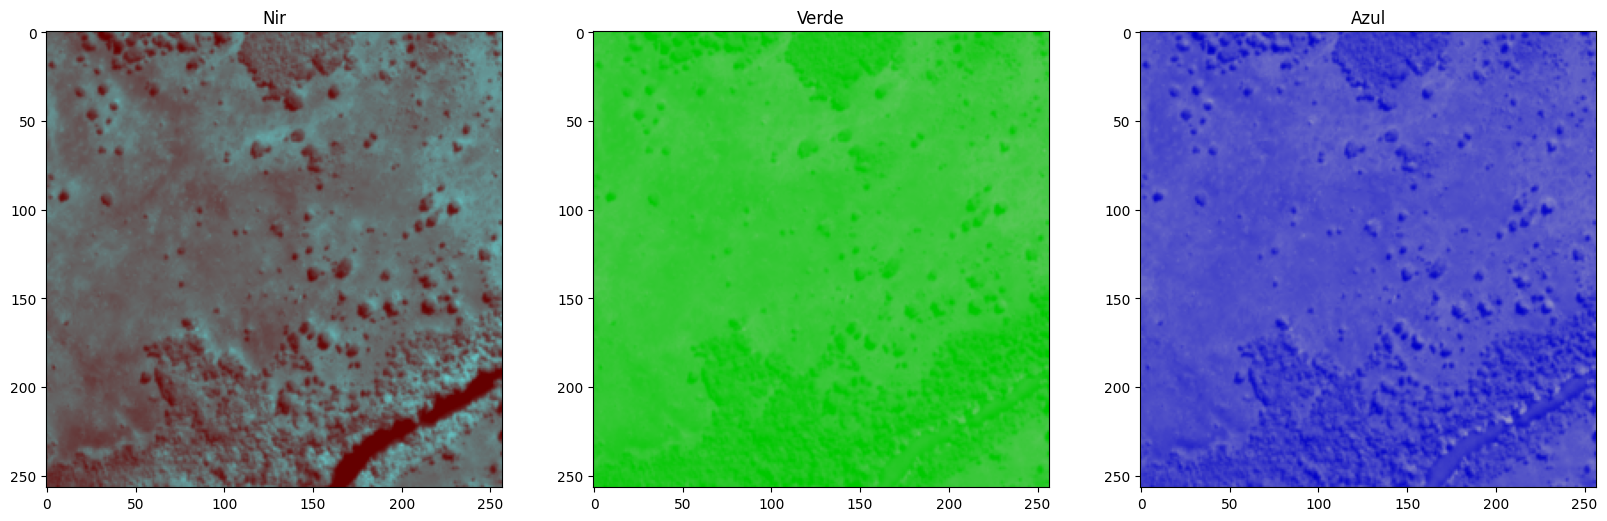

In [ ]:
from matplotlib import pyplot as plt

for i in range(t):
    canal_nir, canal_verde, canal_azul = cv2.split(img_rgb[i])

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    imagem_nir = cv2.merge([canal_nir, canal_nir, canal_nir])
    imagem_nir[:,:,0] = 100
    plt.title("Nir")
    plt.imshow(imagem_nir, cmap='plasma')

    #Verde
    plt.subplot(1, 3, 2)
    imagem_verde = cv2.merge([canal_verde, canal_verde, canal_verde])
    imagem_verde[:,:,1] = 200
    plt.title("Verde")
    plt.imshow(imagem_verde, cmap='Greens')

    #Azul
    plt.subplot(1, 3, 3)
    imagem_azul = cv2.merge([canal_azul, canal_azul, canal_azul])
    imagem_azul[:,:,2] = 200
    plt.title("Azul")
    plt.imshow(imagem_azul, cmap='Blues')

    #Infranir próximo
    # plt.subplot(1, 4, 4)
    # imagem_nir = cv2.merge([canal_alpha, canal_alpha, canal_alpha])
    # imagem = cv2.imread(way[i], cv2.IMREAD_GRAYSCALE) #Tentativa de ver algo no infranir em tons de cinza
    # imagem_nir_equalizada = cv2.equalizeHist(imagem) # Realçar características específicas na imagem NIR
    #imagem_nir[:,:,0:3] = 0
    # plt.title("NIR")
    # plt.imshow(imagem, cmap='gray')
    medidas(canal_nir,canal_verde, canal_azul, i)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Probability density

<ipython-input-8-89a24657a209>:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


0
1
2


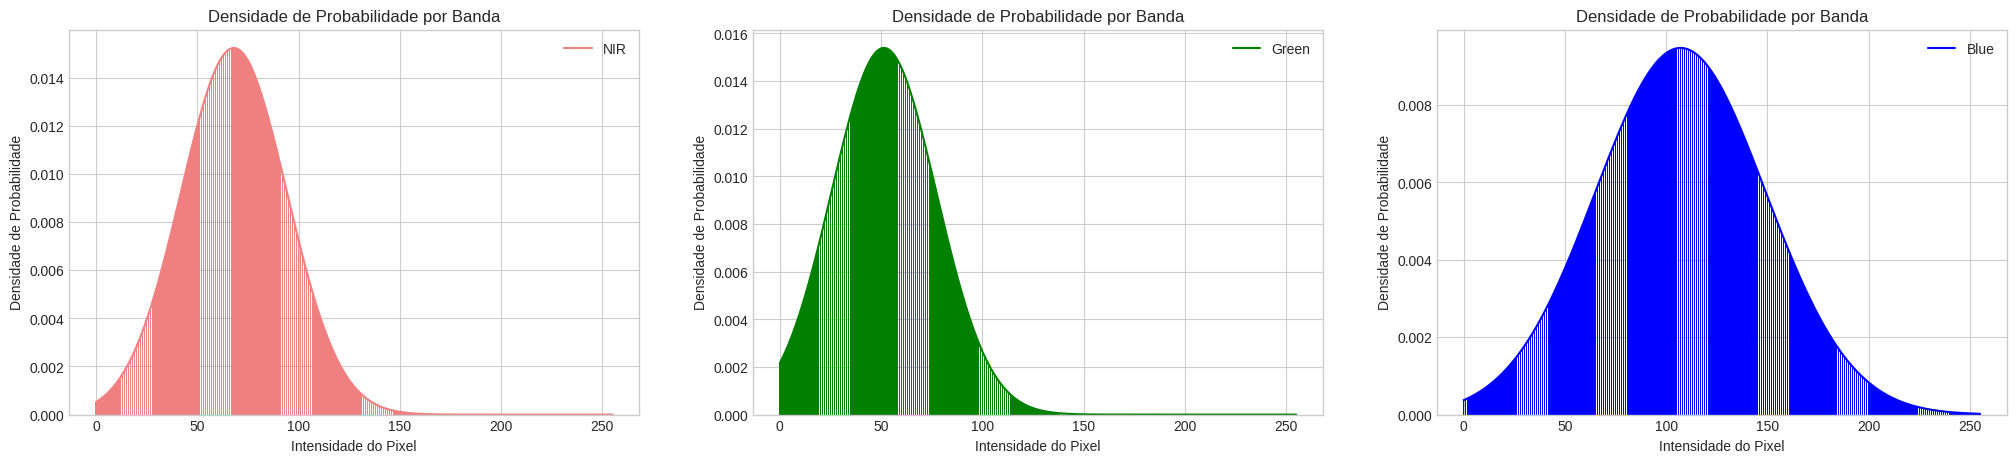

In [ ]:
plt.figure(figsize=(25, 5))
# Lista para armazenar as médias e desvios padrão de cada banda
medias = [[] for _ in range(4)]
desvios_padrao = [[] for _ in range(4)]

# Loop sobre as 1000 imagens
for i in range(len(way)):
    # Carregar a imagem
    imagem = cv2.imread(way[i], cv2.IMREAD_UNCHANGED)

    # Separar as bandas
    r, g, b, n = cv2.split(imagem)

    # Calcular a média e desvio padrão de cada banda
    for j, banda in enumerate([r, g, b, n]):
        media = np.mean(banda)
        desvio_padrao = np.std(banda)

        # Adicionar a média e o desvio padrão à lista correspondente
        medias[j].append(media)
        desvios_padrao[j].append(desvio_padrao)

medias_total = [np.mean(bandas) for bandas in medias]
desvios_padrao_total = [np.mean(desvios) for desvios in desvios_padrao]

# Calcular a densidade de probabilidade gaussiana para cada banda
intensidades = np.linspace(0, 255, 256)
densidades_probabilidade = []
for media, desvio_padrao in zip(medias_total, desvios_padrao_total):
    densidade = (1 / (desvio_padrao * np.sqrt(2 * np.pi))) * np.exp(-(intensidades - media)**2 / (2 * desvio_padrao**2))
    densidades_probabilidade.append(densidade)

# Plotar as densidades de probabilidade gaussiana para cada banda
plt.style.use('seaborn-whitegrid')
k = 0
for i, densidade in enumerate(densidades_probabilidade):
   if i <= 2:
      if i == 0:
        cor = 'lightcoral'
        l = 'NIR'
      elif i == 1:
        cor = 'Green'
        l = 'Green'
      elif i == 2:
        cor = 'Blue'
        l = 'Blue'
      print(i)
      plt.subplot(1, 3, i+1)
      plt.plot(intensidades, densidade, label=l, color=cor)
      plt.bar(intensidades, densidade, color=cor)
      plt.title("Densidade de Probabilidade por Banda")
      plt.xlabel("Intensidade do Pixel")
      plt.ylabel("Densidade de Probabilidade")
      plt.legend()

plt.show()

# Best bandwidth

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

imagem_1d = []
for i in range(len(way)):
    imagem = cv2.imread(way[i], cv2.IMREAD_UNCHANGED)
    imagem_1d.append(imagem.flatten().reshape(-1, 1))

# Convertendo a lista de matrizes em uma matriz 2D
conjunto = np.vstack(imagem_1d)

# Dividir os dados em conjunto de treinamento e teste
X_train_split, X_test_split = train_test_split(conjunto, test_size=0.2, random_state=42)

# Valores de largura de banda candidatos
bandwidths = [1, 2, 3, 4]

best_bandwidth = None
best_score = -1

# Avaliar cada largura de banda candidata
for bandwidth in bandwidths:
    # Ajustar o modelo Mean Shift com a largura de banda atual
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X_train_split)

    # Avaliar o modelo nos dados de teste
    labels = ms.predict(X_test_split)
    score = silhouette_score(X_test_split, labels)

    # Atualizar a melhor largura de banda se o escore atual for melhor
    if score > best_score:
        best_score = score
        best_bandwidth = bandwidth

print("Melhor largura de banda:", best_bandwidth)



# Color histogram

In [ ]:
plt.figure(figsize=(40, 30))
# Calcular o histograma de cores para cada canal (B, G, R, A)
for i in range(t):
  hist_b = cv2.calcHist([img_rgba[i]], [2], None, [256], [1, 255])
  hist_g = cv2.calcHist([img_rgba[i]], [1], None, [256], [1, 255])
  hist_n = cv2.calcHist([img_rgba[i]], [0], None, [256], [1, 255])

  plt.subplot(5, 2, i+1)
  plt.plot(hist_b, color='b', label='Blue')
  plt.plot(hist_g, color='g', label='Green')
  plt.plot(hist_n, color='lightcoral', label='NIR')

  plt.xlabel('Intensidade')
  plt.ylabel('Frequência')
  plt.title(f'Histograma de Cores: {arquivos[i]}')
  plt.legend()

plt.show()

# Thresholding

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(t):
  # Definir o kernel de fechamento
  kernel = np.ones((5,5), np.uint8)

  # Aplicar o fechamento
  _, imagem_fechada = cv2.threshold(img_gray[i], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Mostrar a imagem original e a imagem após fechamento
  plt.subplot(2, 5, i+1)
  plt.imshow(imagem_fechada, cmap='inferno')
  plt.colorbar()

# NVDI

In [ ]:
plt.figure(figsize=(30, 10))

for i in range(t):
  # Converter para float32
  imagem = np.float32(img_rgb[i])

  # Extrair as bandas de infranir próximo (NIR) e nir (RED)
  nir = imagem[:,:,0]
  green = imagem[:,:,1]

  # Calcular NDVI
  ndvi = (nir - green) / (nir + green)

  # Normalizar NDVI para o intervalo de 0 a 255
  ndvi = np.uint8((ndvi + 1) * 127.5)

  # Mostrar o NDVI
  plt.subplot(2, 5, i+1)
  plt.title(f"NVDI: imagem {arquivos[i]}")
  plt.imshow(ndvi, cmap='viridis')
  plt.grid(False)
  plt.colorbar()

plt.show()

# Gaussian Mixture Models (GMMs) as a clustering technique

In [ ]:
from sklearn.mixture import GaussianMixture

imagem_1d = []
clustered_image = []

for i in range(10):
    imagem_equalizada = cv2.equalizeHist(img_gray[i])
    imagem_1d.append(imagem_equalizada.flatten().reshape(-1, 1))

    # Inicializar e ajustar o modelo GMM
    num_clusters = 3
    gmm = GaussianMixture(n_components=num_clusters)
    gmm.fit(imagem_1d[i])

    # Atribuir cada pixel ao cluster correspondente
    clusters = gmm.predict(imagem_1d[i])

    plt.figure(figsize=(40, 20))

    # Plotar a imagem original
    plt.subplot(2, 4, 1)
    plt.imshow(imagem_equalizada, cmap='gray')
    plt.colorbar()
    plt.title('Imagem Original Equalizada')
    plt.axis('off')

    # Plotar a imagem segmentada pelos clusters
    clustered_image = clusters.reshape(imagem_equalizada.shape)
    plt.subplot(2, 4, 2)
    plt.imshow(clustered_image, cmap='viridis')
    plt.colorbar()
    plt.title('Segmentação por GMM')
    plt.axis('off')

    # Imagem não equalizada
    plt.subplot(2, 4, 3)
    clustered_image_2 = clusters.reshape(img_gray[i].shape)
    plt.imshow(clustered_image_2, cmap='viridis')
    plt.colorbar()
    plt.title('Segmentação por GMM(não equalizada)')
    plt.axis('off')

    # Diferença
    plt.subplot(2, 4, 4)
    plt.imshow((imagem_equalizada - img_gray[i]), cmap='gray')
    #plt.colorbar()
    plt.title(f'Diferença: imagem_equalizada[{i}]- img_gray[{i}]')
    plt.axis('off')

    # Imagem equalizada
    plt.subplot(2, 4, 5)
    plt.hist((imagem_equalizada))
    #plt.colorbar()
    plt.title(f'Imagem_equalizada[{i}]')
    plt.axis('off')

    # Histogram of image
    plt.subplot(2, 4, 6)
    plt.hist((img_gray[i]))
    #plt.colorbar()
    plt.title(f'img_gray[{i}]')
    plt.axis('off')

    # Histograma Diferença
    plt.subplot(2, 4, 7)
    plt.hist((imagem_equalizada - img_gray[i]))
    #plt.colorbar()
    plt.title(f'Diferença: imagem_equalizada[{i}]- img_gray[{i}]')
    plt.axis('off')

plt.show()




# Texture

In [ ]:
from skimage.feature import local_binary_pattern


# Parâmetros para o LBP
radius = 2
num_points = 0.5 * radius

# Extrair LBP
for i in range(t):
  lbp = local_binary_pattern(img_gray[i], num_points, radius, method='uniform')

  # Converter LBP para o tipo de dados uint8
  lbp = np.uint8(lbp)

  # Visualizar os resultados
  plt.figure(figsize=(10, 8))

  # Plotar a imagem original
  plt.subplot(1, 2, 1)
  plt.title(f'Imagem: {arquivos[i]}')
  plt.imshow(img_gray[i], cmap='plasma')
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  #Texture
  plt.subplot(1, 2, 2)
  plt.title(f'Texture: {arquivos[i]}')
  plt.imshow(lbp.astype("uint8"), cmap='plasma')
  cv2.waitKey(0)
  cv2.destroyAllWindows()

# Noise

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(t):
    imagem_1d = img_gray[i].flatten().reshape(-1, 1)

    imagem_suavizada = cv2.blur(img_gray[i], (5, 5))  # Utilizando um filtro de média 5x5

    ruido = img_gray[i] - imagem_suavizada

    hist_ruido, bins_ruido = np.histogram(ruido.flatten(), bins=256, range=[0, 256])

    hist, bins = np.histogram(imagem_1d, bins=256, range=[0, 256])

    # Plotar os histogramas
    plt.figure(figsize=(30, 8))

    plt.subplot(1, 4, 1)
    plt.bar(bins_ruido[:-1], hist_ruido, width=1, color='gray')
    plt.title(f'Histograma Com Ruído: {arquivos[i]}')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

    # Exibir o LBP
    plt.subplot(1, 4, 2)
    plt.title(f'Com ruído: {arquivos[i]}')
    plt.imshow(imagem_suavizada, cmap='gray')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    plt.subplot(1, 4, 3)
    plt.bar(bins[:-1], hist, width=1, color='gray')
    plt.title(f'Histograma sem Ruído: {arquivos[i]}')
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

    # Plotar a imagem original
    plt.subplot(1, 4, 4)
    plt.title(f'Sem ruído: {arquivos[i]}')
    plt.imshow(img_gray[i], cmap='gray')
    cv2.waitKey(0)
    cv2.destroyAllWindows()

plt.show()


# Noise 2

In [ ]:
def histplot(imagem):
  canais_2 = cv2.split(imagem)
  hist_r = cv2.calcHist([canais_2[0]], [0], None, [256], [0, 256])
  hist_g = cv2.calcHist([canais_2[1]], [0], None, [256], [0, 256])
  hist_b = cv2.calcHist([canais_2[2]], [0], None, [256], [0, 256])
  plt.xlabel("Intensidade")
  plt.ylabel("Frequência")
  plt.plot(hist_r, color='r', label='Red')
  plt.plot(hist_g, color='g', label='Green')
  plt.plot(hist_b, color='b', label='Blue')
  plt.legend()

In [ ]:
# Definir os parâmetros do ruído gaussiano
media = 0
desvio_padrao = 1  # Ajuste conforme necessário, quanto maior, mais perceptível será o ruído

for i in range(t):
  # Gerar ruído gaussiano
  altura, largura, canais = img_rgba[i].shape
  ruido = np.random.normal(media, desvio_padrao, (altura, largura, canais))

  # Adicionar ruído à imagem
  imagem_com_ruido = cv2.add(img_rgba[i], ruido.astype(np.uint8))

  plt.figure(figsize=(20, 8))

  # Plotar a imagem original
  plt.subplot(1, 4, 1)
  plt.title(f'Imagem sem ruído: {arquivos[i]}')
  plt.imshow(img_rgba[i])
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  #Histograma sem ruído
  plt.subplot(1, 4, 2)
  plt.title(f'Sem ruído: {arquivos[i]}')
  histplot(img_rgba[i])

  #Ruído
  plt.subplot(1, 4, 3)
  plt.title(f'Com ruído: {arquivos[i]}')
  plt.imshow(imagem_com_ruido)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  #Histograma com ruído
  plt.subplot(1, 4, 4)
  plt.title(f'Com ruído: {arquivos[i]}')
  histplot(imagem_com_ruido)

plt.show()